In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the datasets
holdout_df = pd.read_csv('cell2cellholdout.csv')
train_df = pd.read_csv('cell2celltrain.csv')

# Merge the datasets
merged_df = pd.concat([holdout_df, train_df], ignore_index=True)

# Save the merged dataset
merged_df.to_csv('cell2cell.csv', index=False)

In [4]:
df = pd.read_csv("cell2cell.csv")

C:\Users\84898\AppData\Local\Temp\ipykernel_20256\1540989328.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cell2cell.csv")


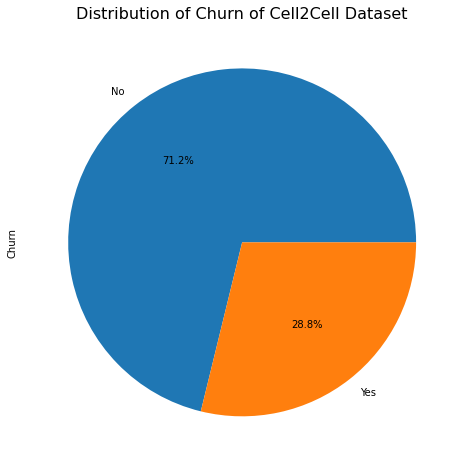

In [6]:
plt.figure(figsize=(10, 8))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Churn of Cell2Cell Dataset', fontsize=16)
plt.show()
